# Prueba Intertrimestral

Nombre y Apellidos:

Tiempo de la prueba: 1h y 45 mins

Asignatura: Desarrollo de Aplicaciones para la Visualización de Datos

Fecha: 14 de octubre de 2024

Instrucciones:

- Herramientas Sugeridas: Python (pandas, matplotlib, seaborn, scikit-learn).

- Evaluación: Se valorará la capacidad para interpretar los resultados y la claridad en la exposición de las conclusiones.

- Materiales permitidos: Materiales de clase. Internet para búsqueda de dudas y documentación.

- Prohibido: Mingún tipo de LLM, ni mensajería instantánea.

- Formato de Entrega: Los estudiantes deben presentar su trabajo en formato de notebook (por ejemplo, Jupyter Notebook), con gráficos y explicaciones detalladas.

- Entrega: Subir .ipynb y PDF a Github. Enviar resultados al siguiente enlace. Para crear PDF: File -> Print -> Destination as PDF

## [Entrega aquí el examen](https://forms.gle/gU7aKkzE7didZpYV7)




Carga aquí las librerías que creas que vayas a utilizar:

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error
from itertools import combinations


# Ejercicio 1: Programación (2 puntos)

a) Crea una función que calcule y devuelva el valor de la iteración $n+1$ del mapa logístico dada la fórmula:

$x_{n+1}=r⋅x_n⋅(1−x_n)$

donde:

- $r$ es la tasa de crecimiento
- $x_n$ es el valor de la iteración anterior.

La función debe aceptar como parámetros $r$ y $x_n$ (valor inicial). (0.6 puntos)


In [3]:
def mapa_logistico(r, xn):
    return r * xn * (1 - xn)

mapa_logistico(0.25, 0.5)

0.0625

La función mapa_logistico recibe dos parámetros:
r: La tasa de crecimiento.
xn: El valor de la iteración anterior

*b*) Crea una función que genere una lista con las primeras n iteraciones del mapa logístico, utilizando la función anterior. (0.6 puntos)

In [4]:
def generar_iteraciones(r, x0, n):
    iteraciones = [x0]  # Iniciar la lista con el valor inicial x0
    xn = x0

    for _ in range(n - 1):
        xn = mapa_logistico(r, xn)  # Calcular x_{n+1} usando la función anterior
        iteraciones.append(xn)  # Agregar el resultado a la lista de iteraciones

    return iteraciones

generar_iteraciones(0.25, 0.1, 10)

[0.1,
 0.022500000000000003,
 0.005498437500000001,
 0.0013670511712646485,
 0.0003412955855899481,
 8.529477572830123e-05,
 2.1321875132383672e-05,
 5.330355127506128e-06,
 1.3325816787050857e-06,
 3.331449757327888e-07]

c) Guarda en un dataframe las iteraciones del mapa logístico, para $r = \{0, 0.25, 0.5, 0.75, \dots, 4\}$ y semilla $x_0 = 0.2$. El dataframe debe tener tres columnas: $r$, $n$ y $x_{n+1}$. Muestra los 10 primeros resultados (0.6 puntos)

In [9]:
# Parámetros iniciales
x0 = 0.2
n_iteraciones = 10
valores_r = [(i + 1) * 0.25 for i in range(17)]  # Genera valores de r de 0 a 4 con paso de 0.25

# Lista para almacenar los resultados
resultados = []

# Generar y almacenar resultados en la lista
for r in valores_r:
    iteraciones = generar_iteraciones(r, x0, n_iteraciones)
    for n, xn in enumerate(iteraciones):
        resultados.append([r, n, xn])

# Crear el DataFrame
df = pd.DataFrame(resultados, columns=['r', 'n', 'xn+1'])

# Mostrar los 10 primeros resultados
print(df.head(100))

       r  n      xn+1
0   0.25  0  0.200000
1   0.25  1  0.040000
2   0.25  2  0.009600
3   0.25  3  0.002377
4   0.25  4  0.000593
..   ... ..       ...
95  2.50  5  0.600000
96  2.50  6  0.600000
97  2.50  7  0.600000
98  2.50  8  0.600000
99  2.50  9  0.600000

[100 rows x 3 columns]


d) ¿Cómo se podría programar en una clase las dos funciones anteriores para calcular y almacenar iteraciones del mapa logístico? Proporciona la implementación de la clase con un método para obtener el valor de una iteración específica, otro método para generar la lista completa de iteraciones y otro para crear un gráfico que visualice el $r$ y $x_{n+1}$. (0.2 puntos)

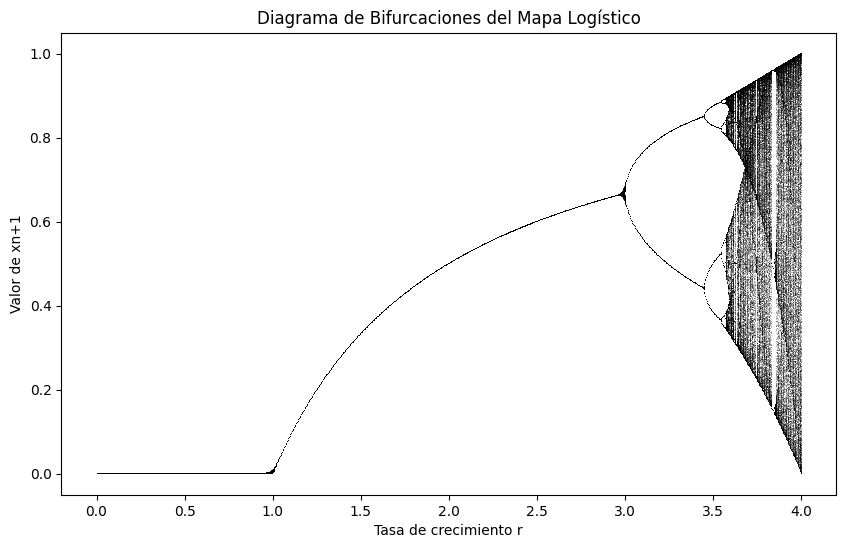

In [24]:
class MapaLogistico:
    def __init__(self, x0, n_iteraciones, n_descartar=100):
        """
        Inicializa la clase con el valor inicial x0, número de iteraciones y cantidad de iteraciones a descartar.

        Parámetros:
        - x0: valor inicial
        - n_iteraciones: total de iteraciones a realizar
        - n_descartar: número de iteraciones iniciales a descartar (para obtener puntos del comportamiento estable)
        """
        self.x0 = x0
        self.n_iteraciones = n_iteraciones
        self.n_descartar = n_descartar

    def calcular_iteracion(self, r, xn):
        """Calcula la siguiente iteración usando la fórmula del mapa logístico."""
        return r * xn * (1 - xn)

    def generar_bifurcaciones(self, r_min=2.5, r_max=4.0, r_pasos=1000):
        """
        Genera las iteraciones finales para cada valor de r en el rango dado y las almacena en un DataFrame.

        Parámetros:
        - r_min: valor mínimo de r
        - r_max: valor máximo de r
        - r_pasos: número de pasos (puntos de r) en el rango de r
        """
        resultados = []
        valores_r = np.linspace(r_min, r_max, r_pasos)  # Genera valores de r entre r_min y r_max

        for r in valores_r:
            xn = self.x0  # Valor inicial para cada r
            # Realizar iteraciones
            for i in range(self.n_iteraciones):
                xn = self.calcular_iteracion(r, xn)
                if i >= self.n_descartar:  # Guardar solo las iteraciones después del descarte
                    resultados.append([r, xn])

        # Guardar los resultados en un DataFrame
        self.resultados = pd.DataFrame(resultados, columns=['r', 'xn+1'])

    def graficar_bifurcaciones(self):
        """Genera el diagrama de bifurcación usando los valores almacenados en el DataFrame."""
        plt.figure(figsize=(10, 6))
        plt.plot(self.resultados['r'], self.resultados['xn+1'], ',k', alpha=0.25)
        plt.xlabel("Tasa de crecimiento r")
        plt.ylabel("Valor de xn+1")
        plt.title("Diagrama de Bifurcaciones del Mapa Logístico")
        plt.show()


# Crear una instancia de la clase
mapa = MapaLogistico(x0=0.2, n_iteraciones=1000, n_descartar=100)

# Generar las bifurcaciones para r en el rango [2.5, 4.0]
mapa.generar_bifurcaciones(r_min=0, r_max=4.0, r_pasos=1000)

# Graficar el diagrama de bifurcaciones
mapa.graficar_bifurcaciones()

# Ejercicio 2: Exploración y comprensión (3 puntos)

a) Describe las principales variables del dataset proporcionado. ¿Qué información aportan y qué tipo de datos contiene cada una? ¿Existen valores faltantes en el dataset? Si es así, ¿en qué variables? ¿Qué propones para resolverlo? (1 puntos)


Variables del Dataset
Store - Identificador único para cada tienda. Cada tienda tiene un número que la identifica.
Tipo de dato: Entero (int).
Información que aporta: Permite distinguir las ventas y otros datos asociados a cada tienda de forma individual.

Date - Fecha específica de las ventas semanales.
Tipo de dato: Fecha (datetime).
Información que aporta: Indica el momento temporal en que se registraron las ventas, permitiendo análisis temporales (semanales, mensuales, etc.).

Weekly_Sales - Ventas semanales totales en dólares de cada tienda en la fecha específica.
Tipo de dato: Float (número decimal).
Información que aporta: Es la variable objetivo (target) en muchos análisis de ventas, ya que mide el desempeño de cada tienda en términos de ingresos semanales.

Holiday_Flag - Indicador binario de feriado nacional en la semana (1 = semana con feriado, 0 = semana sin feriado).
Tipo de dato: Entero (int).
Información que aporta: Permite analizar si los feriados tienen un impacto en las ventas, ya que las semanas con feriado podrían mostrar patrones de consumo diferentes a las semanas sin feriado.

Temperature - Temperatura promedio semanal (en grados Fahrenheit) en la región de la tienda.
Tipo de dato: Float (número decimal).
Información que aporta: Ofrece contexto ambiental que podría influir en el comportamiento de los consumidores, afectando indirectamente las ventas.

Fuel_Price - Precio promedio semanal de la gasolina en la región de la tienda.
Tipo de dato: Float (número decimal).
Información que aporta: El precio del combustible puede influir en el poder adquisitivo y en la disposición de los consumidores a desplazarse, impactando potencialmente las ventas.

CPI (Consumer Price Index) - Índice de precios al consumidor promedio semanal.
Tipo de dato: Float (número decimal).
Información que aporta: El índice de precios al consumidor (CPI) mide la inflación y puede influir en el comportamiento de compra de los consumidores y en el poder adquisitivo.

Unemployment - Tasa de desempleo semanal en la región de la tienda.
Tipo de dato: Float (número decimal).
Información que aporta: El nivel de desempleo es un indicador económico que puede influir en las ventas. En épocas de mayor desempleo, los ingresos de los consumidores tienden a reducirse, lo que podría reflejarse en menores ventas.

In [26]:
def load_and_check_missing(filepath):
    # Cargar el archivo CSV
    df = pd.read_csv(filepath)

    # Verificar valores faltantes
    missing_info = df.isnull().sum()
    missing_values = missing_info[missing_info > 0]

    # Mostrar el resultado
    if missing_values.empty:
        print("No hay valores faltantes en el dataset.")
    else:
        print("Valores faltantes encontrados:")
        print(missing_values)
        # Eliminar filas con valores faltantes
        df = df.dropna()
        print("Registros con valores faltantes eliminados.")

    return df

df = load_and_check_missing('https://raw.githubusercontent.com/dmartincc/davd-24-25/refs/heads/main/Intertrimestral/Walmart.csv')


Valores faltantes encontrados:
Unemployment    1
dtype: int64
Registros con valores faltantes eliminados.


b) Realiza un gráfico de barras que responda las siguientes preguntas. ¿Cuántas tiendas $Store$ están presentes en el dataset? ¿Cuál es la media de ventas semanales $Weekly Sales$ por tienda? ¿Qué tiendas tienen las ventas promedio más altas y más bajas? (1 puntos)



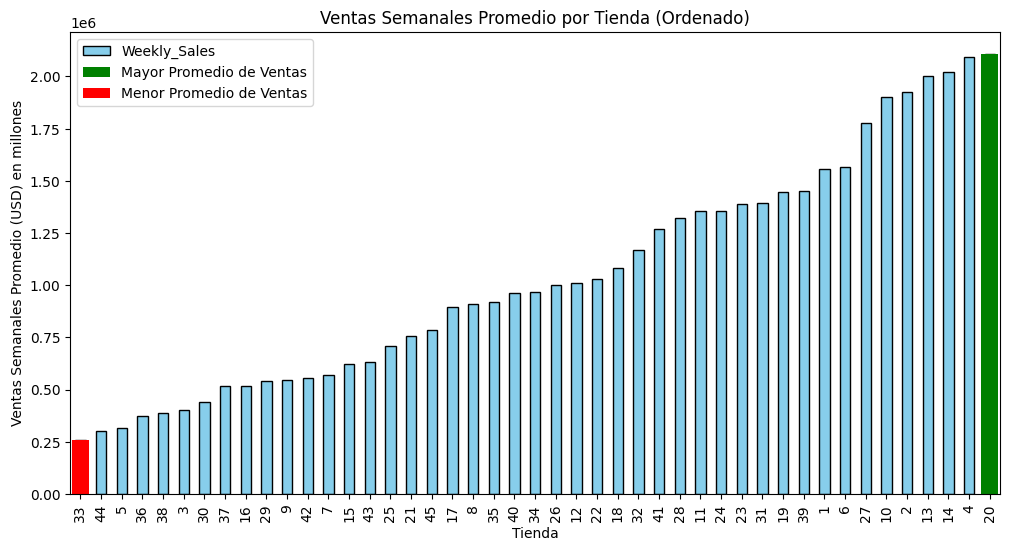

In [34]:
# Convertir la columna 'Date' a tipo de dato datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Calcular la media de ventas semanales por tienda y ordenar las tiendas por ventas promedio
ventas_promedio = df.groupby('Store')['Weekly_Sales'].mean().sort_values()

# Identificar los valores máximos y mínimos después de ordenar
tienda_max_ventas = ventas_promedio.idxmax()
tienda_min_ventas = ventas_promedio.idxmin()

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
bars = ventas_promedio.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Ventas Semanales Promedio por Tienda (Ordenado)')
plt.xlabel('Tienda')
plt.ylabel('Ventas Semanales Promedio (USD) en millones')

# Destacar las tiendas con las ventas promedio más altas y más bajas
# Utilizamos `ventas_promedio.index.get_loc` para obtener la posición de las tiendas destacadas
plt.bar(ventas_promedio.index.get_loc(tienda_max_ventas), ventas_promedio.max(), color='green', label='Mayor Promedio de Ventas')
plt.bar(ventas_promedio.index.get_loc(tienda_min_ventas), ventas_promedio.min(), color='red', label='Menor Promedio de Ventas')

plt.legend()
plt.show()

c) Genera un gráfico de líneas que muestre la evolución de las ventas semanales $Weekly Sales$ a lo largo del tiempo para la tienda con más ventas totales. ¿Observas algún patrón estacional o tendencia? (1 puntos)

# Ejrcicio 3: Análisis de Factores Externos (2 puntos)

a) Explora la relación entre el precio de combustible $Fuel Price$, la tasa de desempleo $Unemployment$ y las ventas semanales $Weekly Sales$. ¿Existe alguna correlación significativa? Genera dos gráficos de dispersión (scatter plot) para ilustrarlo. (1 puntos)

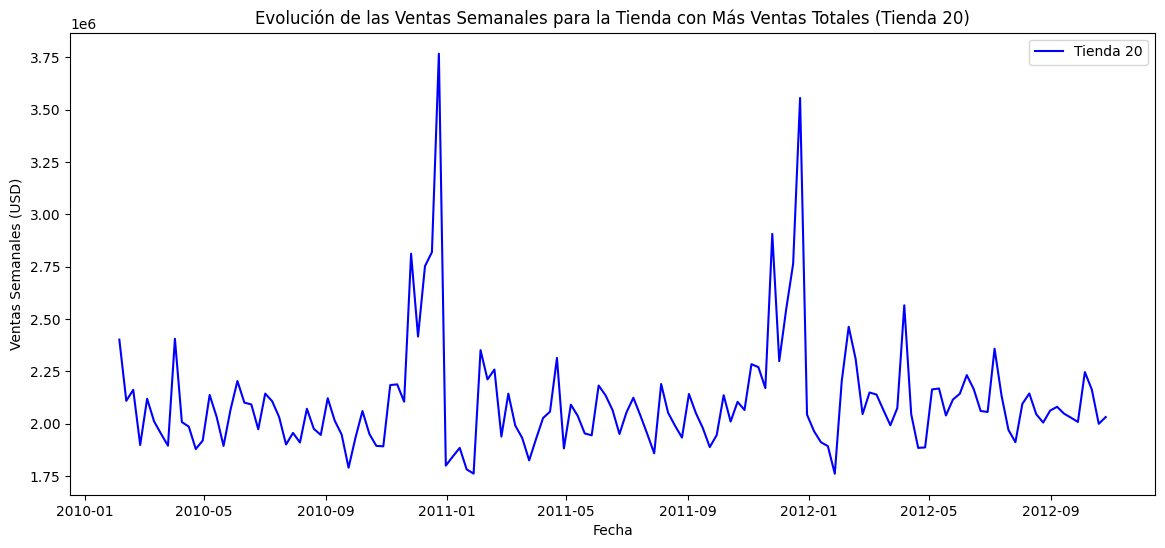

In [42]:
# Calcular las ventas totales por tienda y seleccionar la tienda con mayores ventas
ventas_totales = df.groupby('Store')['Weekly_Sales'].sum()
tienda_mayor_ventas = ventas_totales.idxmax()

# Filtrar el dataset para obtener los datos de la tienda con más ventas
df_tienda = df[df['Store'] == tienda_mayor_ventas]

# Ordenar por fecha para un gráfico de líneas preciso
df_tienda = df_tienda.sort_values('Date')

# Crear el gráfico de líneas
plt.figure(figsize=(14, 6))
plt.plot(df_tienda['Date'], df_tienda['Weekly_Sales'], color='blue', label=f'Tienda {tienda_mayor_ventas}')
plt.title(f'Evolución de las Ventas Semanales para la Tienda con Más Ventas Totales (Tienda {tienda_mayor_ventas})')
plt.xlabel('Fecha')
plt.ylabel('Ventas Semanales (USD)')
plt.legend()
plt.grid(False)
plt.show()

En el gráfico de líneas se observan varios picos que parecen indicar patrones estacionales, especialmente alrededor de los fines de año en 2010, 2011 y 2012. Esto puede sugerir un aumento en las ventas semanales durante las temporadas de fin de año, posiblemente debido a la temporada de compras navideñas, que es común en el comercio minorista.

Patrones estacionales:
Se ven incrementos significativos en las ventas hacia finales de cada año (cerca de diciembre), lo cual podría reflejar la temporada navideña y otras festividades.
Las ventas alcanzan su punto más alto a principios de 2011 y 2012, seguidos de caídas bruscas, lo cual sugiere compras intensivas durante las festividades.

Tendencia general:
Aparte de los picos estacionales, las ventas se mantienen relativamente estables, con algunas fluctuaciones menores entre las temporadas altas. No parece haber una tendencia sostenida de crecimiento o declive a largo plazo fuera de los picos estacionales.


c) Compara las ventas promedio de las semanas festivas $Holiday Flag = 1$ con las semanas no festivas $Holiday Flag = 0$. ¿Cuál es la diferencia promedio de ventas entre estos dos tipos de semanas? ¿Existe una diferencia estadísticamente significativa? (1 puntos)


Ventas promedio en semanas festivas: 1122887.89
Ventas promedio en semanas no festivas: 1041310.38
Diferencia promedio de ventas: 81577.51
Valor de t: 2.6783
Valor p: 0.0076
La diferencia en ventas promedio es estadísticamente significativa (p < 0.05).


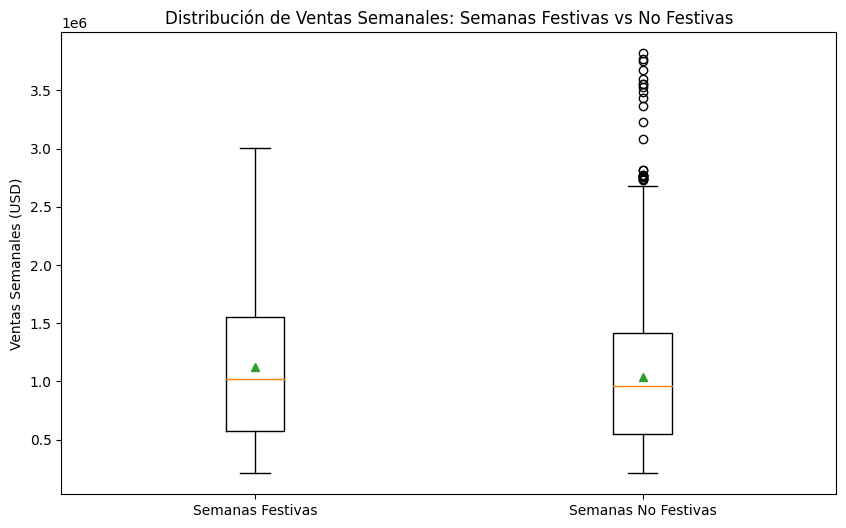

In [41]:
# Filtrar las semanas festivas y no festivas
ventas_festivas = df[df['Holiday_Flag'] == 1]['Weekly_Sales']
ventas_no_festivas = df[df['Holiday_Flag'] == 0]['Weekly_Sales']

# Calcular las ventas promedio de semanas festivas y no festivas
media_festivas = ventas_festivas.mean()
media_no_festivas = ventas_no_festivas.mean()

# Calcular la diferencia promedio de ventas entre semanas festivas y no festivas
diferencia_promedio = media_festivas - media_no_festivas

# Realizar la prueba t para determinar si la diferencia es estadísticamente significativa
t_stat, p_value = stats.ttest_ind(ventas_festivas, ventas_no_festivas, equal_var=False)

# Mostrar resultados
print(f"Ventas promedio en semanas festivas: {media_festivas:.2f}")
print(f"Ventas promedio en semanas no festivas: {media_no_festivas:.2f}")
print(f"Diferencia promedio de ventas: {diferencia_promedio:.2f}")
print(f"Valor de t: {t_stat:.4f}")
print(f"Valor p: {p_value:.4f}")

# Evaluación de significancia
if p_value < 0.05:
    print("La diferencia en ventas promedio es estadísticamente significativa (p < 0.05).")
else:
    print("No se encontró una diferencia estadísticamente significativa en las ventas promedio entre semanas festivas y no festivas.")

# Crear el gráfico de caja (boxplot)
plt.figure(figsize=(10, 6))
plt.boxplot([ventas_festivas, ventas_no_festivas], labels=['Semanas Festivas', 'Semanas No Festivas'], showmeans=True)
plt.ylabel('Ventas Semanales (USD)')
plt.title('Distribución de Ventas Semanales: Semanas Festivas vs No Festivas')
plt.grid(False)
plt.show()

# Ejercicio 4: Modelado predictivo (2 puntos)

a) Encuentra el mejor modelo de regresión lineal para predecir las ventas semanales $Weekly Sales$ en función de las variables disponibles. Prueba múltiples combinaciones de variables. (1.5 puntos)

b) Compara los modelos evalúando el R² y el error cuadrático medio (MSE). ¿Cuál es el modelo con mejores métricas? (0.5 puntos)



In [55]:
# Convertir 'Date' a tipo datetime y extraer la semana del año
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df['WeekOfYear'] = df['Date'].dt.isocalendar().week

# Crear lags de una semana para las variables seleccionadas
lagged_columns = ['Weekly_Sales']
for col in lagged_columns:
    df[f'{col}_lag_1'] = df[col].shift(1)

# Eliminar filas con valores nulos resultantes de los lags
df.dropna(inplace=True)

# Función para probar diferentes combinaciones de variables
def probar_combinaciones(X_train, X_test, y_train, y_test):
    variables = X_train.columns
    mejores_resultados = {'variables': None, 'R2': -np.inf, 'RMSE': np.inf, 'MAE': np.inf}

    # Probar todas las combinaciones de variables
    for r in range(1, len(variables) + 1):
        for combo in combinations(variables, r):
            # Seleccionar las variables de la combinación actual
            X_train_combo = X_train[list(combo)]
            X_test_combo = X_test[list(combo)]

            # Entrenar el modelo de regresión lineal
            modelo = LinearRegression()
            modelo.fit(X_train_combo, y_train)

            # Hacer predicciones y calcular métricas
            y_pred = modelo.predict(X_test_combo)
            r2 = r2_score(y_test, y_pred)
            rmse = np.sqrt(mean_squared_error(y_test, y_pred))
            mae = mean_absolute_error(y_test, y_pred)

            # Guardar el mejor modelo en base a R2
            if r2 > mejores_resultados['R2']:
                mejores_resultados['variables'] = combo
                mejores_resultados['R2'] = r2
                mejores_resultados['RMSE'] = rmse
                mejores_resultados['MAE'] = mae

    return mejores_resultados

# Separar las variables dependiente e independientes con lags
X_lags = df[['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'WeekOfYear', 'Month', 'Weekly_Sales_lag_1']]
y_lags = df['Weekly_Sales']

# Dividir los datos en conjuntos de entrenamiento y prueba con lags
X_train_lags, X_test_lags, y_train_lags, y_test_lags = train_test_split(X_lags, y_lags, test_size=0.3, random_state=42)

# Ejecutar la función y obtener el mejor modelo con lags
mejor_modelo_lags = probar_combinaciones(X_train_lags, X_test_lags, y_train_lags, y_test_lags)

# Mostrar los resultados del mejor modelo con lags
print("Mejor combinación de variables (con lags):", mejor_modelo_lags['variables'])
print("R² del modelo (con lags):", mejor_modelo_lags['R2'])
print("RMSE del modelo (con lags):", mejor_modelo_lags['RMSE'])
print("MAE del modelo (con lags):", mejor_modelo_lags['MAE'])

# Separar las variables dependiente e independientes sin lags
X_no_lags = df[['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'WeekOfYear', 'Month']]
y_no_lags = df['Weekly_Sales']

# Dividir los datos en conjuntos de entrenamiento y prueba sin lags
X_train_no_lags, X_test_no_lags, y_train_no_lags, y_test_no_lags = train_test_split(X_no_lags, y_no_lags, test_size=0.3, random_state=42)

# Ejecutar la función y obtener el mejor modelo sin lags
mejor_modelo_no_lags = probar_combinaciones(X_train_no_lags, X_test_no_lags, y_train_no_lags, y_test_no_lags)

# Mostrar los resultados del mejor modelo sin lags
print("\nMejor combinación de variables (sin lags):", mejor_modelo_no_lags['variables'])
print("R² del modelo (sin lags):", mejor_modelo_no_lags['R2'])
print("RMSE del modelo (sin lags):", mejor_modelo_no_lags['RMSE'])
print("MAE del modelo (sin lags):", mejor_modelo_no_lags['MAE'])

Mejor combinación de variables (con lags): ('Store', 'Holiday_Flag', 'Unemployment', 'WeekOfYear', 'Month', 'Weekly_Sales_lag_1')
R² del modelo (con lags): 0.8881999501697355
RMSE del modelo (con lags): 187867.83642417402
MAE del modelo (con lags): 90706.54701045652

Mejor combinación de variables (sin lags): ('Store', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Month')
R² del modelo (sin lags): 0.1563337188524061
RMSE del modelo (sin lags): 516079.7057770052
MAE del modelo (sin lags): 430551.6669811546


# Ejercicio 5: Conclusiones y Recomendaciones (1 punto)

a) Redacta un informe de máximo 500 palabras resumiendo los principales hallazgos del análisis de datos y la modelización. Incluye tus conclusiones sobre qué factores influyen más en las ventas y recomendaciones para la empresa basadas en el análisis.

# Informe de Análisis de Ventas para Walmart

Este informe presenta un análisis exhaustivo de los datos de ventas semanales de Walmart, con el objetivo de identificar patrones, tendencias y factores clave que impactan en el rendimiento de las ventas. Se han aplicado diversas técnicas estadísticas y de modelado para extraer conclusiones valiosas que pueden guiar la toma de decisiones estratégicas.

## Análisis Exploratorio de Datos

El análisis exploratorio ha revelado hallazgos significativos:

1. **Patrones Estacionales**: Las ventas de Walmart presentan un patrón estacional claro, con picos notables durante las festividades, especialmente en torno a las fiestas de fin de año. Esto indica que los eventos estacionales influyen considerablemente en el comportamiento del consumidor y, por ende, en las ventas.

2. **Variabilidad entre Tiendas**: Se observó una notable variabilidad en las ventas medias entre diferentes tiendas, lo que sugiere que factores específicos como la ubicación, el tamaño y el tipo de productos ofrecidos son determinantes en el rendimiento. Esta variabilidad debe ser analizada para identificar mejores prácticas y oportunidades de mejora.

3. **Relación con Variables Macroeconómicas**: Las variables macroeconómicas, como la temperatura, el precio del combustible, el índice de precios al consumidor y la tasa de desempleo, muestran correlaciones con las ventas; sin embargo, **por sí solas, estas variables solo explican aproximadamente un 15% de la variabilidad en las ventas**. Esto indica que, aunque tienen un efecto, no son los únicos factores que influyen en el rendimiento de las ventas y que es necesario considerar otros elementos para una comprensión más completa.

## Modelado de las Ventas

Se desarrollaron modelos de regresión para predecir las ventas semanales de Walmart utilizando diversas variables explicativas. Los resultados indican que:

- **Variables Estacionales**: La inclusión de variables estacionales (mes, semana del año) mejora notablemente el poder predictivo, confirmando la relevancia de la estacionalidad en las ventas.

- **Lag de Ventas**: Utilizar un retraso (lag) de las ventas semanales como variable explicativa también mejora el ajuste del modelo, sugiriendo que las ventas de una semana están correlacionadas con las de la semana anterior.

- **Otras Variables**: Variables como la tienda, días festivos, tasa de desempleo y temperatura muestran relaciones significativas con las ventas, aunque su impacto puede diferir según el modelo específico.

## Conclusiones y Recomendaciones

A partir de los resultados del análisis, se extraen las siguientes conclusiones y recomendaciones para Walmart:

1. **Estacionalidad como Factor Clave**: Se recomienda desarrollar estrategias de marketing y promoción específicas para las temporadas altas, aprovechando los picos de ventas en estas épocas. Esto incluye campañas dirigidas y promociones especiales que se alineen con las festividades.

2. **Análisis Detallado por Tienda**: Es crucial realizar un análisis más profundo del rendimiento de cada tienda para identificar las causas de las variaciones en ventas y aplicar medidas correctivas cuando sea necesario. Esto puede incluir ajustes en la oferta de productos o la optimización del personal.

3. **Monitorización de Variables Macroeconómicas**: Walmart debe seguir de cerca variables como temperatura, precio del combustible y tasa de desempleo, ya que pueden afectar significativamente las ventas en ciertas regiones. Un seguimiento proactivo permitirá una mejor planificación de recursos y promociones, aunque es importante recordar que estas variables, por sí solas, explican solo un 15% de la variabilidad en las ventas.

4. **Uso de Modelos Predictivos**: La implementación de modelos predictivos permitirá anticipar fluctuaciones en las ventas, facilitando decisiones informadas sobre la gestión de inventario, la asignación de recursos y las promociones.

5. **Exploración de Otras Variables**: Se sugiere investigar otras variables, como la competencia local, eventos especiales en la región y características demográficas de los clientes, para obtener una comprensión más profunda de los factores que influyen en las ventas.

## Limitaciones del Análisis

Es relevante considerar las siguientes limitaciones:

- **Datos Históricos**: El análisis se basa en datos históricos que pueden no reflejar futuras tendencias, especialmente en un entorno de mercado cambiante.

- **Variables Omitidas**: Pueden existir variables importantes que no se han incluido en el análisis, lo que podría afectar los resultados y la precisión de las predicciones.

- **Causalidad vs Correlación**: La identificación de relaciones entre variables y las ventas no implica causalidad, por lo que se recomienda un enfoque cauteloso en la interpretación de los resultados.
